<a href="https://colab.research.google.com/github/MinhoKang/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_10%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 10강

In [1]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,450 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

- 런타임 -> 세션 다시 시작

In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 10-1 Matplotlib 기본 구조

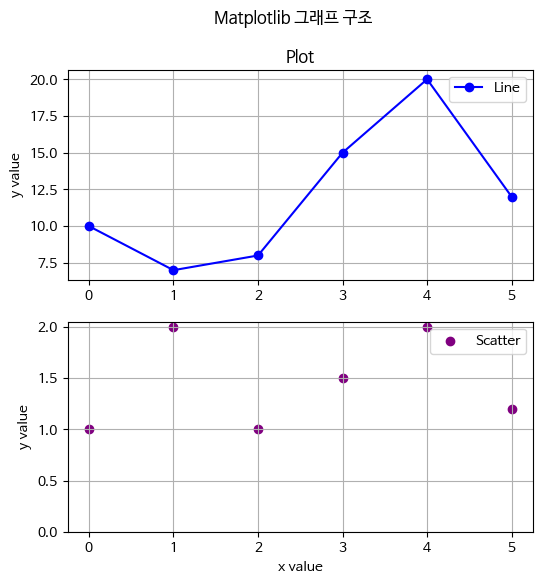

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 데이터 생성
x = np.arange(0, 6, 1)
y1 = [10, 7, 8, 15, 20, 12]
y2 = [1, 2, 1, 1.5, 2, 1.2]

## 2개의 서브플롯 생성 (2행 1열)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

## 첫 번째 서브플롯: 라인 플롯
axes[0].plot(x, y1, linestyle='-', marker='o', color='b', label="Line")
axes[0].set_title("Plot")
axes[0].set_ylabel("y value")
axes[0].grid(True)
axes[0].legend()

## 두 번째 서브플롯: 산점도
axes[1].scatter(x, y2, color='purple', label="Scatter", marker='o')
axes[1].set_xlabel("x value")
axes[1].set_ylabel("y value")
axes[1].grid(True)
axes[1].legend()

## x축 및 y축 눈금 설정
axes[1].set_xticks(np.arange(0, 6, 1))
axes[1].set_xticklabels(["0", "1", "2", "3", "4", "5"])
axes[1].set_yticks([0, 0.5, 1, 1.5, 2])

## 전체 그래프 제목 설정 및 표시
fig.suptitle("Matplotlib 그래프 구조")
plt.show()

## 10-2 표

In [3]:
import pandas as pd

## 데이터 딕셔너리 정의
data = {
    '이름': ['김지은', '이민호', '박서연', '최준영', '정다혜'],
    '나이': [27, 32, 29, 35, 24],
    '성적': [92, 85, 95, 78, 88],
    '부서': ['개발팀', '인사팀', '개발팀', '재무팀', '마케팅팀'] }

## 딕셔너리를 이용하여 DataFrame 생성
df = pd.DataFrame(data)

## DataFrame 출력
df

,이름,나이,성적,부서
0,김지은,27,92,개발팀
1,이민호,32,85,인사팀
2,박서연,29,95,개발팀
3,최준영,35,78,재무팀
4,정다혜,24,88,마케팅팀


from matplotlib import pyplot as plt
df['나이'].plot(kind='hist', bins=20, title='나이')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['성적'].plot(kind='hist', bins=20, title='성적')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('이름').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('부서').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='나이', y='성적', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['나이'].plot(kind='line', figsize=(8, 4), title='나이')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['성적'].plot(kind='line', figsize=(8, 4), title='성적')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['부서'].value_counts()
    for x_label, grp in df.groupby('이름')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('이름')
_ = plt.ylabel('부서')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['이름'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='나이', y='이름', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['부서'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='나이', y='부서', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['이름'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='성적', y='이름', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['부서'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='성적', y='부서', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 10-3 선 그래프 그리기

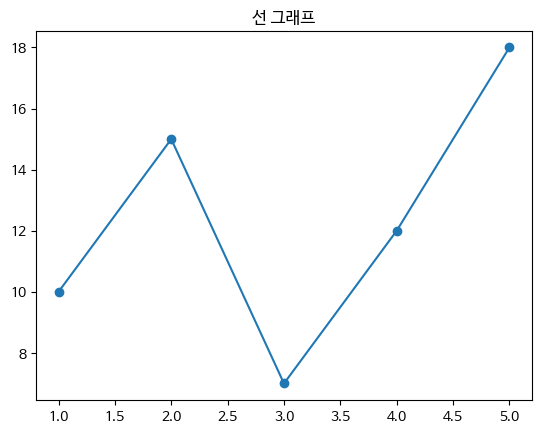

In [6]:
import matplotlib.pyplot as plt

## 데이터 정의
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 12, 18]

## 선 그래프 그리기
plt.plot(x,y, marker='o')


# 제목 설정
plt.title('선 그래프')
plt.show()

## 10-4 막대 그래프 그리기

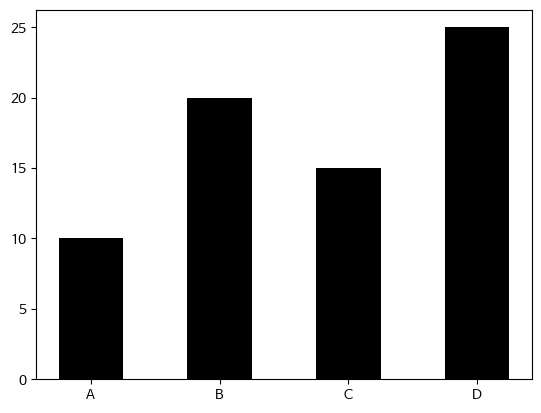

In [14]:
import matplotlib.pyplot as plt

## 데이터 정의
categories = ['A', 'B', 'C', 'D']
values = [10, 20, 15, 25]

## 막대 그래프 그리기
plt.bar(categories, values, width=0.5, color='black')

plt.show()

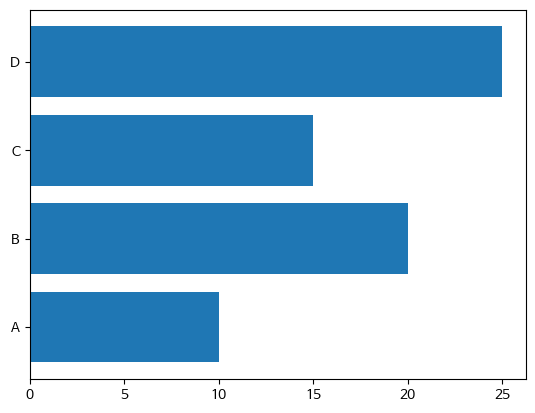

In [15]:
import matplotlib.pyplot as plt

## 데이터 정의
categories = ['A', 'B', 'C', 'D']
values = [10, 20, 15, 25]

## 가로 막대 그래프 그리기
plt.barh(categories, values)

plt.show()

## 10-5 히스토그램 그리기

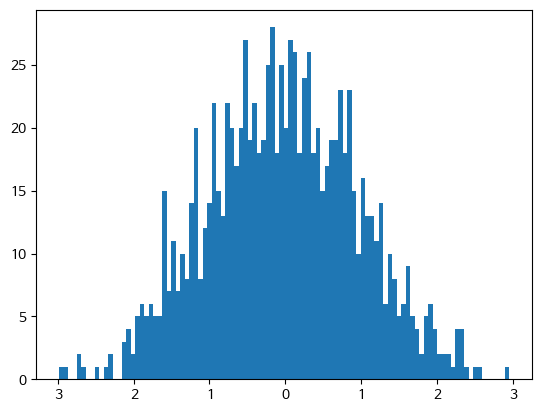

In [19]:
import matplotlib.pyplot as plt
import numpy as np

## 데이터 생성 (정규 분포를 따르는 1000개의 난수)
data = np.random.randn(1000)

## 히스토그램 그리기
plt.hist(data, bins=100)

plt.show()

## 10-6 산점도 그리기

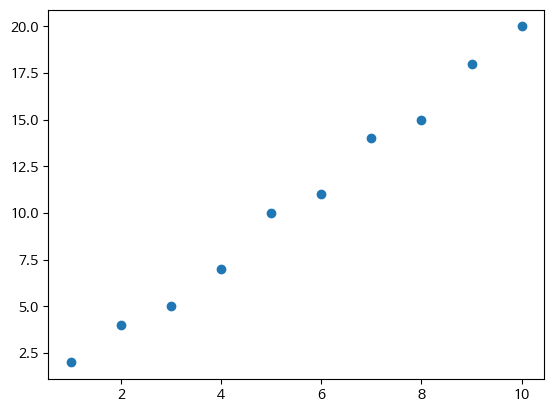

In [20]:
import matplotlib.pyplot as plt

## 데이터 정의
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 4, 5, 7, 10, 11, 14, 15, 18, 20]

## 산점도 그리기
plt.scatter(x, y)

plt.show()

## 10-7 박스 플롯 그리기

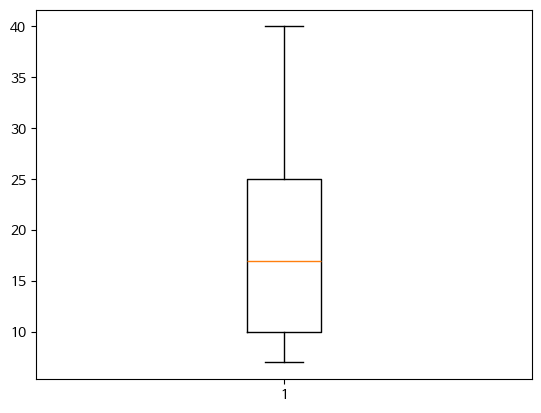

In [21]:
import matplotlib.pyplot as plt

## 데이터 정의
data = [7, 8, 9, 10, 15, 16, 17, 18, 19, 25, 30, 35, 40]

## 박스 플롯 그리기
plt.boxplot(data)

plt.show()

## 10-8 파이 차트 그리기

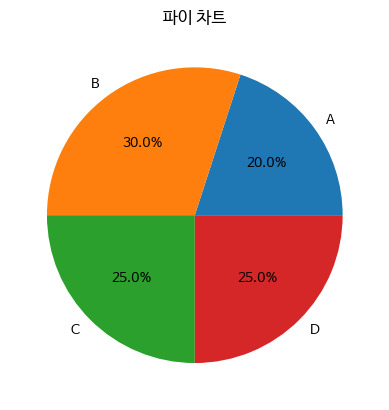

In [25]:
import matplotlib.pyplot as plt

## 데이터 정의
labels =['A','B','C','D']
sizes =[20,30,25,25]

## 파이 차트 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title("파이 차트")
plt.show()

## 10-9 히트맵 그리기

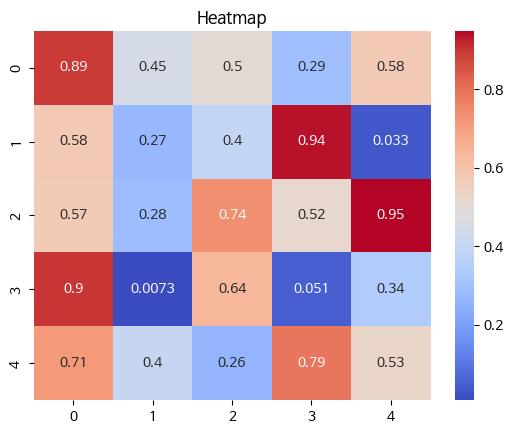

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 데이터 생성 (5x5 크기의 무작위 행렬)
data = np.random.rand(5, 5)

## seaborn을 이용하여 히트맵 그리기
sns.heatmap(data, annot=True, cmap='coolwarm')

plt.title("Heatmap")
plt.show()

## 10-10 레이더 차트 그리기

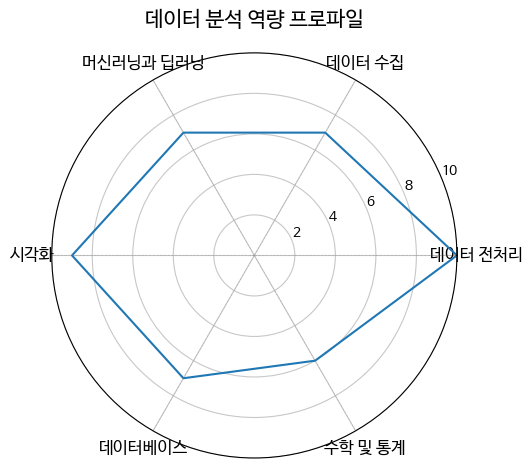

In [28]:
import numpy as np
import matplotlib.pyplot as plt

## 데이터 정의
labels = ['데이터 전처리', '데이터 수집', '머신러닝과 딥러닝', '시각화', '데이터베이스', '수학 및 통계']
values = [10, 7, 7, 9, 7, 6]
n = len(labels)

## 각 축의 각도 계산 및 데이터 반복 추가 (닫힌 그래프를 위해)
angles = np.linspace(0, 2 * np.pi, n, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

## 레이더 차트 생성 (극 좌표계의 라인 그래프)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, values)



## 축 라벨 및 눈금 설정
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticks([2, 4, 6, 8, 10])
ax.set_yticklabels(['2', '4', '6', '8', '10'], fontsize=10)
ax.set_ylim(0, 10)
ax.grid(True, linestyle='-', alpha=0.7)

## 각 축에 가이드라인 추가
for angle, label in zip(angles[:-1], labels):
    ax.plot([angle, angle], [0, 10], '--', color='gray', alpha=0.3, linewidth=0.5)

plt.title('데이터 분석 역량 프로파일', fontsize=15, pad=20)
plt.tight_layout()
plt.show()

## 10-11 3D 차트 그리기

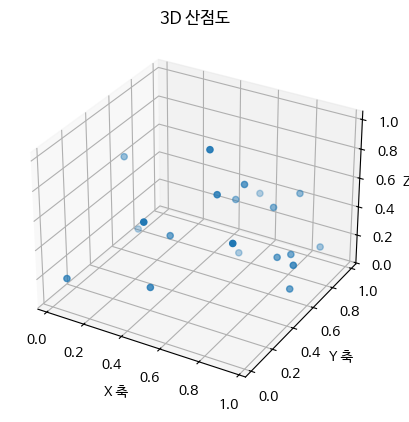

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## 데이터 생성
np.random.seed(0)
x = np.random.rand(20)
y = np.random.rand(20)
z = np.random.rand(20)

## 3D 그래프 설정
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 3D 산점도 그리기
ax.scatter(x, y, z)
ax.set_xlabel("X 축")
ax.set_ylabel("Y 축")
ax.set_zlabel("Z 축")
ax.set_title("3D 산점도")

plt.show()

## 10-12 3D 막대 그래프 그리기

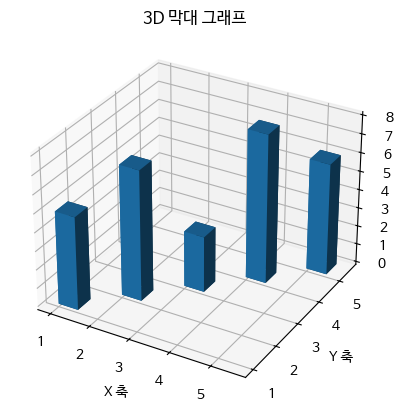

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## 데이터 정의
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
z = np.zeros(5) ## 막대 바닥의 Z 좌표
heights = np.array([5, 7, 3, 8, 6]) ## 각 막대의 높이

## 3D 그래프 설정
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 3D 막대 그래프 그리기
## x, y, z: 각 막대의 시작 위치 (바닥)
## 0.5, 0.5: 각 막대의 너비와 깊이
## heights: 각 막대의 높이
ax.bar3d(x, y, z, 0.5, 0.5, heights)

## 축 레이블 및 제목 설정
ax.set_xlabel("X 축")
ax.set_ylabel("Y 축")
ax.set_zlabel("높이")
ax.set_title("3D 막대 그래프")

plt.show()

## 10-13 Folium을 이용한 지도 시각화

In [40]:
import folium

## 지도 생성 (서울 시청 (37.5665, 126.9780) 중심, 확대 레벨 12)
map = folium.Map(location =[37.5665, 126.9780], zoom_start=20)
## 마커 추가
# 한국방송통신대학교 대학본부 (37.5792, 127.0029)
folium.Marker([37.5792, 127.0029], popup='방송대').add_to(map)

## 지도를 HTML 파일로 저장
map.save("map_visualization.html")

In [41]:
map

## 10-14 NetworkX를 이용한 그래프 시각화

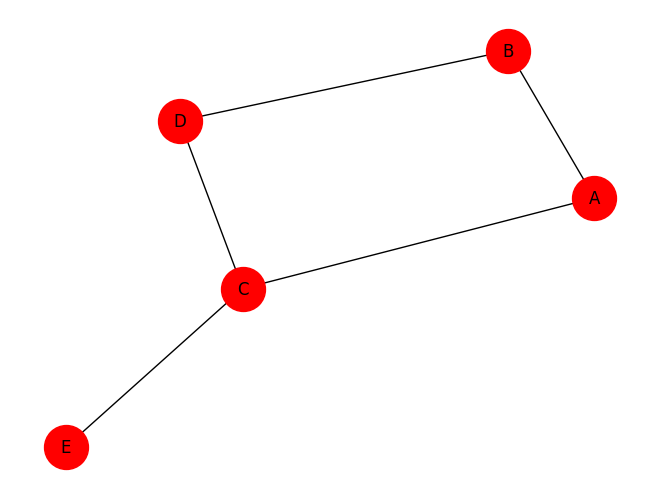

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

## 그래프 객체 생성
G = nx.Graph()

## 노드(정점) 추가
G.add_nodes_from(["A", "B", "C", "D", "E"])

## 엣지(간선) 추가
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("C", "E")])

## 그래프 시각화
nx.draw(G, with_labels=True, node_size=1000, node_color='red')

plt.show()

## 10-15 바이올린 플롯 그리기

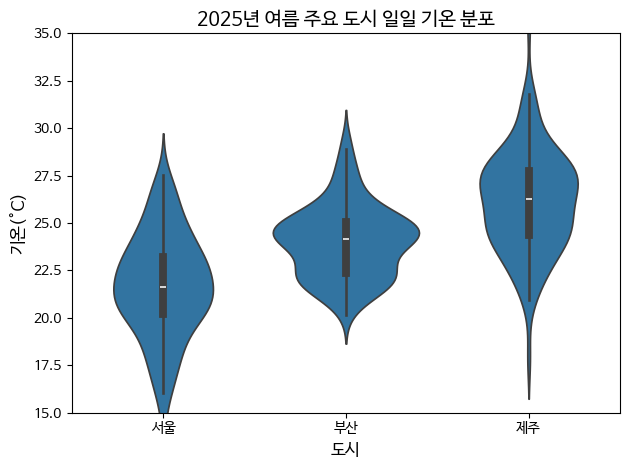

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

np.random.seed(42) ## 난수 시드 설정

## 도시별 가상 기온 데이터 생성
seoul_temp = np.random.normal(22, 3, 100)
busan_temp = np.random.normal(24, 2, 100)
jeju_temp = np.random.normal(26, 2.5, 100)

## DataFrame 생성
data = pd.DataFrame({
    '도시': ['서울'] * 100 + ['부산'] * 100 + ['제주'] * 100,
    '기온(°C)': np.concatenate([seoul_temp, busan_temp, jeju_temp])
})

## seaborn을 이용하여 바이올린 플롯 그리기
sns.violinplot(x='도시', y='기온(°C)', data=data)

## 그래프 제목 및 축 레이블 설정
plt.title('2025년 여름 주요 도시 일일 기온 분포', fontsize=14)
plt.xlabel('도시', fontsize=12)
plt.ylabel('기온(°C)', fontsize=12)
plt.ylim(15, 35)

plt.tight_layout()
plt.show()

## 10-16 등고선 그래프 그리기

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


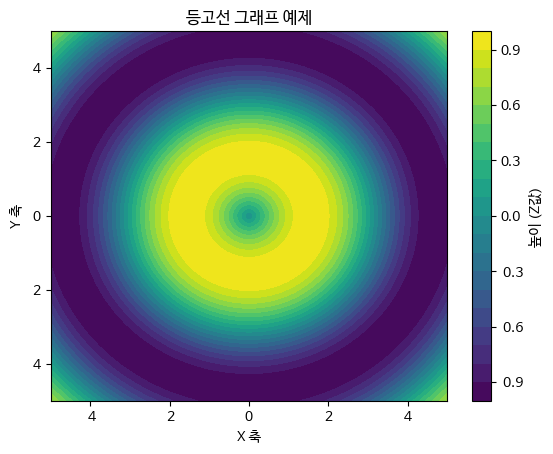

In [48]:
import numpy as np

## 데이터 생성
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = np.sin(np.sqrt(X**2 + Y**2))

# 등고선 그래프 그리기
contour = plt.contourf(X,Y,Z, levels=20)


# 색상 막대 추가 및 레이블 설정
cbar = plt.colorbar(contour)
cbar.set_label('높이 (Z값)')

## 제목 및 축 레이블 설정
plt.title("등고선 그래프 예제")
plt.xlabel("X 축")
plt.ylabel("Y 축")

plt.show()

# 개념 실습 정리 1

- 온라인 쇼핑몰의 판매 데이터를 분석하고 시각적으로 표현

- [영국 기반의 온라인 소매업체 데이터를 활용](https://archive.ics.uci.edu/dataset/352/online+retail)함
  - 이 데이터셋은 2010년 1월 12일부터 2011년 12월 9일 까지의 약 1년간의 거래 기록을 포함

1. 데이터 준비 (다운로드 및 로드)

In [ ]:
import pandas as pd

## 데이터셋 URL 정의
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

## 데이터셋 로드
retail_data = pd.read_excel(url)

## 데이터셋 크기 출력
print("데이터셋 크기:", retail_data.shape)

## 첫 5개 행 출력
print("\n첫 5개 행:")
print(retail_data.head())

## 데이터 정보 출력
print("\n데이터 정보:")
print(retail_data.info())

## 기술 통계 요약 출력
print(retail_data.describe().to_markdown())

2. 데이터 전처리

In [ ]:
## CustomerID가 없는 행 제거
retail_data_clean = retail_data.dropna(subset=['CustomerID'])
## 중복된 행 제거
retail_data_clean = retail_data_clean.drop_duplicates()
## 수량(Quantity)과 단가(UnitPrice)가 0보다 큰 유효한 데이터만 필터링
retail_data_clean = retail_data_clean[(retail_data_clean['Quantity'] > 0) &
                                      (retail_data_clean['UnitPrice'] > 0)]

## 총 가격(TotalPrice) 컬럼 생성
retail_data_clean['TotalPrice'] = retail_data_clean['Quantity'] * retail_data_clean['UnitPrice']

## InvoiceDate에서 시간 관련 특성 추출
retail_data_clean['Year'] = retail_data_clean['InvoiceDate'].dt.year
retail_data_clean['Month'] = retail_data_clean['InvoiceDate'].dt.month
retail_data_clean['Day'] = retail_data_clean['InvoiceDate'].dt.day
retail_data_clean['DayOfWeek'] = retail_data_clean['InvoiceDate'].dt.dayofweek
retail_data_clean['Hour'] = retail_data_clean['InvoiceDate'].dt.hour

## 전처리 후 데이터 크기 및 첫 5개 행 출력
print("\n전처리 후 데이터 크기:", retail_data_clean.shape)
print("\n전처리 후 첫 5개 행:")
print(retail_data_clean.head())

3. 월별 총 매출 추이 시각화

In [49]:
import matplotlib.pyplot as plt

## 월별 총 매출 계산
# retail_data_clean을 Year와 Month 단위로 그룹화 한 후 TotalPrice의 합을 구함
monthly_sales = retail_data_clean.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

# YearMonth 칼럼에 label을 설정
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

## 월별 총 매출 추이 시각화
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalPrice'])

## 그래프 제목 및 축 레이블 설정
plt.title('월별 총 매출 추이', fontsize=15)
plt.xlabel('연월', fontsize=12)
plt.ylabel('총 매출(£)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

NameError: name 'retail_data_clean' is not defined

4. 국가별 총 매출 시각화 (상위 10개국)

In [ ]:
## 국가별 총 매출 계산 및 상위 10개국 추출
# retail_data_clean을 Country 단위로 그룹화 한 후 TotalPrice의 합을 구함

# 역순으로 정렬한 다음 상위 10개 선택


## 국가별 총 매출 시각화 (막대 그래프)


## 그래프 제목 및 축 레이블 설정
plt.title('국가별 총 매출 (상위 10개국)', fontsize=15)
plt.xlabel('국가', fontsize=12)
plt.ylabel('총 매출(£)', fontsize=12)
plt.grid(True, axis='y') ## Y축 그리드만 표시
plt.show()

5. 요일 및 시간대별 주문 횟수 히트맵

In [ ]:
import seaborn as sns

## 요일 및 시간대별 주문 횟수 계산
# 일, 시간으로 그룹화 한 후 횟수(size)를 측정


## 요일 인덱스 한글명으로 변경
day_names = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
hourly_orders.index = [day_names[i] for i in hourly_orders.index]

## 히트맵 시각화


## 그래프 제목 및 축 레이블 설정
plt.title('요일 및 시간대별 주문 횟수', fontsize=15)
plt.xlabel('시간', fontsize=12)
plt.ylabel('요일', fontsize=12)
plt.show()